In [1]:
%config Completer.use_jedi = False

import statsmodels.api as sm


import numpy as np 
import pandas as pd
from pathlib import Path


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats


from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
import xgboost



from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
df = pd.read_csv('diabetes.csv')
df.head(18)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
features_list = list(df.drop(columns='Outcome').columns)
columns = list(df.columns)
print(features_list, '\n')


for feature in data.columns:
    print(feature, ':', len(data[feature].unique()),)
print('\n')
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'output':
        label = [feature]
    elif len(data[feature].unique()) < 15:
        discrete_features.append(feature)
    else:
        continuous_features.append(feature)
print('Discrete: ', discrete_features, '\n', 'Continuous: ', continuous_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


Discrete:  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'] 
 Continuous:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [5]:
isnull = df.isnull().sum()
print(isnull)

isnull2=data.isnull().sum()
print(isnull2)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [6]:
dup = df.duplicated(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
dup.value_counts()

False    768
dtype: int64

In [7]:
df.drop_duplicates(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
sdf = df.apply(standardize_var) 
sdf_X = sdf[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
corr = np.array(sdf_X.corr()) 
corr_inv = np.linalg.inv(corr) 
 
fit = ols('Outcome~Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',data=sdf).fit()
 
variables = [] 
reg_coef = [] 
vif = [] 
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])
    
df_res = pd.DataFrame()
df_res['Different Aspects'] = variables
df_res['Estimation'] = reg_coef
df_res['Variance inflation factor(VIF)'] = vif

df_res

,Different Aspects,Estimation,Variance inflation factor(VIF)
0,Pregnancies,0.145478,1.430872
1,Glucose,0.396868,1.298961
2,BloodPressure,-0.094633,1.181863
3,SkinThickness,0.005168,1.507432
4,Insulin,-0.043622,1.427536
5,BMI,0.218928,1.297450
6,DiabetesPedigreeFunction,0.102283,1.067090
7,Age,0.064636,1.588368


<AxesSubplot:title={'center':'Co-relatiom of DIABETES '}>

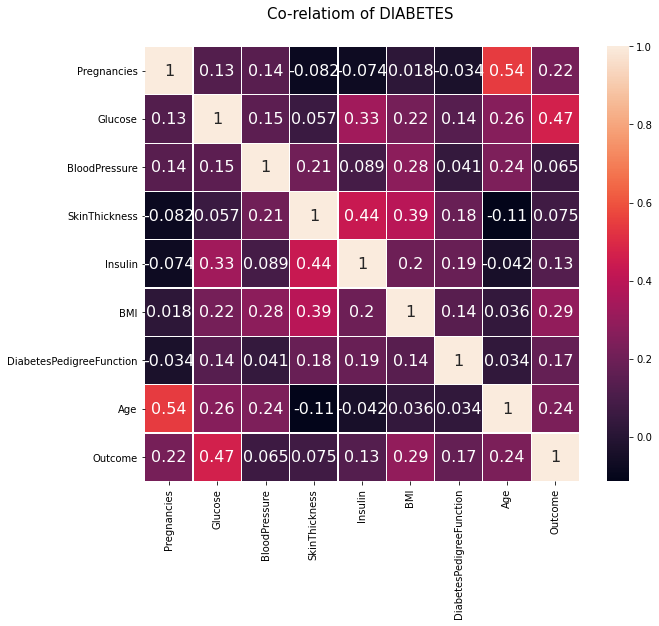

In [9]:
plt.figure(figsize=(10, 8)) 
plt.title("Co-relatiom of DIABETES ", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, annot = True, annot_kws = {"size" : 16})

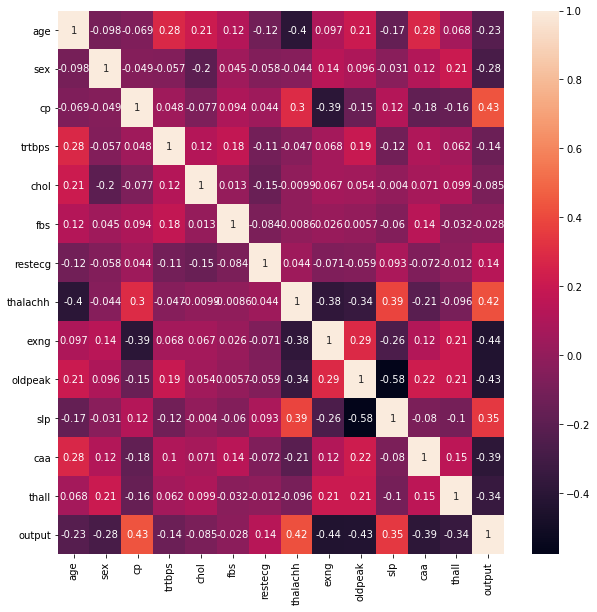

In [10]:
curr_data = continuous_features + ['output']
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [11]:
model2 = ols('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age', df).fit()
table2 = sm.stats.anova_lm(model2, type=2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
Pregnancies,1.0,8.591143,8.591143,53.638189,6.164705e-13
Glucose,1.0,34.020758,34.020758,212.406175,1.327103e-42
BloodPressure,1.0,0.123476,0.123476,0.770911,3.802132e-01
SkinThickness,1.0,0.863789,0.863789,5.393003,2.048132e-02
Insulin,1.0,0.255349,0.255349,1.594251,2.071077e-01
BMI,1.0,6.780158,6.780158,42.331432,1.398272e-10
DiabetesPedigreeFunction,1.0,1.817752,1.817752,11.349002,7.929848e-04
Age,1.0,0.458924,0.458924,2.865257,9.092163e-02
Residual,759.0,121.567819,0.160168,NaN,NaN


In [12]:
df2 = table2[table2['PR(>F)'] < 0.05]
df2

,df,sum_sq,mean_sq,F,PR(>F)
Pregnancies,1.0,8.591143,8.591143,53.638189,6.164705e-13
Glucose,1.0,34.020758,34.020758,212.406175,1.327103e-42
SkinThickness,1.0,0.863789,0.863789,5.393003,2.048132e-02
BMI,1.0,6.780158,6.780158,42.331432,1.398272e-10
DiabetesPedigreeFunction,1.0,1.817752,1.817752,11.349002,7.929848e-04


In [13]:
features = df[['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']]
Y = df['Outcome']

In [20]:
best_features = SelectKBest(chi2, k=10)
features_ranking = best_features.fit(data.drop(['output'], axis=1), data['output'])
ranking_dictionary = {}
for i in range(len(features_ranking.scores_)):
    ranking_dictionary[data.columns[i]] = round(features_ranking.scores_[i], 3)

asc_sort = sorted(ranking_dictionary.items(), key = lambda kv:(kv[1], kv[0]))

for i, j in asc_sort:
    print(i, ':', j)

fbs : 0.203
restecg : 2.978
thall : 5.792
sex : 7.577
slp : 9.804
trtbps : 14.824
age : 23.287
chol : 23.936
exng : 38.914
cp : 62.598
caa : 66.441
oldpeak : 72.644
thalachh : 188.32


In [21]:
feature_model = SelectFromModel(Lasso(alpha=0.05, random_state=0))
feature_model.fit(data.drop(['output'], axis=1), data['output'])

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [22]:
mask = feature_model.get_support() 
for i in range(len(mask)):
    if not mask[i]:
        print(data.drop(['output'], axis=1).columns[i])

age
fbs
restecg
exng
slp


In [23]:
data1 = data.drop(['slp', 'age', 'sex', 'restecg'], axis=1)
# data1 = data

print(data1.shape)

(303, 10)


In [24]:
X = data1.drop(['output'], axis=1)
y = data1['output']
X.head()

,cp,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,thall
0,3,145,233,1,150,0,2.3,0,1
1,2,130,250,0,187,0,3.5,0,2
2,1,130,204,0,172,0,1.4,0,2
3,1,120,236,0,178,0,0.8,0,2
4,0,120,354,0,163,1,0.6,0,2


In [14]:
train_features, test_features, train_labels, test_labels = train_test_split(features, Y) #1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #2
print(X_train.shape, X_test.shape)

(242, 9) (61, 9)


In [15]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)  #1
test_features = scaler.transform(test_features)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   #2
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()             #1
model.fit(train_features, train_labels)

LogisticRegression()

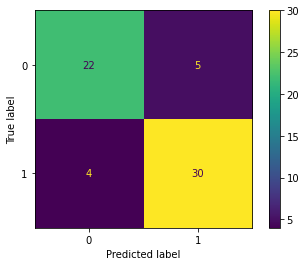

In [30]:
model2 = LogisticRegression(solver='newton-cg')
model2.fit(X_train, y_train)
predicted=model2.predict(X_test)          #2
conf = plot_confusion_matrix(model2, X_test, y_test)
# conf_map = pd.DataFrame(conf, [''])


In [17]:
print(model.score(train_features, train_labels))   #1


0.7760416666666666


In [29]:
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print(classification_report(y_test, predicted))     #2

The accuracy of Logistic Regression is :  85.24590163934425 %
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [33]:

dataset_X = df.iloc[:,[1, 2, 5,6, 7]].values
print(dataset_X)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_X)


arr = [10, 30,31.6,0.2, 80]
float_features = [float(x) for x in arr]
final_features = [np.array(float_features)]
prediction = model.predict(sc.transform(final_features))


[[148.     72.     33.6     0.627  50.   ]
 [ 85.     66.     26.6     0.351  31.   ]
 [183.     64.     23.3     0.672  32.   ]
 ...
 [121.     72.     26.2     0.245  30.   ]
 [126.     60.     30.1     0.349  47.   ]
 [ 93.     70.     30.4     0.315  23.   ]]


In [34]:
print(prediction)

[0]


In [37]:

data_X2 = data.iloc[:,[2, 3, 4,5, 7,8 ,9,11,12]].values
print(data_X2)


[[  3.  145.  233.  ...   2.3   0.    1. ]
 [  2.  130.  250.  ...   3.5   0.    2. ]
 [  1.  130.  204.  ...   1.4   0.    2. ]
 ...
 [  0.  144.  193.  ...   3.4   2.    3. ]
 [  0.  130.  131.  ...   1.2   1.    3. ]
 [  1.  130.  236.  ...   0.    1.    2. ]]


In [40]:

sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(data_X2)


arr1 = [3,145,233,1,150,0,2.3,0,1]
float_features = [float(x) for x in arr1]
final_features = [np.array(float_features)]
prediction2 = model2.predict(sc.transform(final_features))

In [41]:
print(prediction2)

[1]
